## Assignment 1




## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$.

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).

---


# Problem 1: **Solution**

## Observation: Nonlinear Separability of XOR

In a **two-dimensional** space, XOR data is not linearly separable. This means that there is no **single straight line** that can separate points belonging to class 0 from points belonging to class 1.

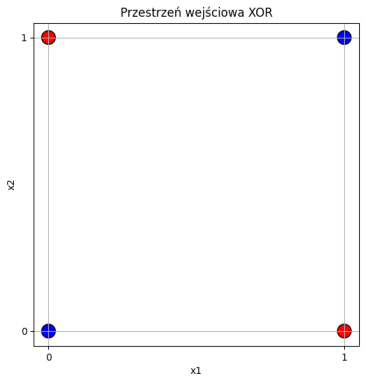

## Observation: How XOR Works

XOR can be expressed as:
$
\text{XOR}(x_1, x_2) = (x_1 \lor x_2) \land \lnot (x_1 \land x_2),
$



---


### Krótka notatka: Myślenie za doborem wag i biasów

1. **Cel**: Rozdzielić nieliniowo separowalne dane XOR za pomocą sieci neuronowej.
2. **Strategia**:
   - Warstwa ukryta przekształca dane w przestrzeń, gdzie stają się liniowo separowalne.
   - Neurony ukryte symulują bramki logiczne:
     - **OR**: Aktywuje się, gdy przynajmniej jedno wejście to `1`.
     - **NAND**: Aktywuje się, gdy nie oba wejścia to `1`.
   - Warstwa wyjściowa symuluje **AND**, aby połączyć wyniki z warstwy ukrytej.
3. **Wagi i biasy**:
   - **Duże wagi**: Zapewniają silny sygnał, aby aktywacja funckcją sigmoid była bliska `0` lub `1`.
   - **Biasy**: Przesuwają funkcję aktywacji, aby neurony działały jak wyżej wypisane bramki logiczne.
4. **Proces doboru**:  
   Dzięki eksperymentom **"na kartce"** dobrałem odpowiednie wartości wag i biasów, aby najpierw konkretne neurony zachowywały się jak bramki logiczne dla wszystkich możliwych wejść: `[0, 0]`, `[0, 1]`, `[1, 0]`, `[1, 1]`.  
   - Najpierw dobierałem wagi, aby zapewnić odpowiednią siłę sygnału.  
   - Następnie szukałem biasów, które przesuwają funkcję aktywacji w odpowiednie miejsce.  
   - Poprzez metodę prób i błędów znalazłem balans, który pozwala na jak najlepszą symulację bramek logicznych.

   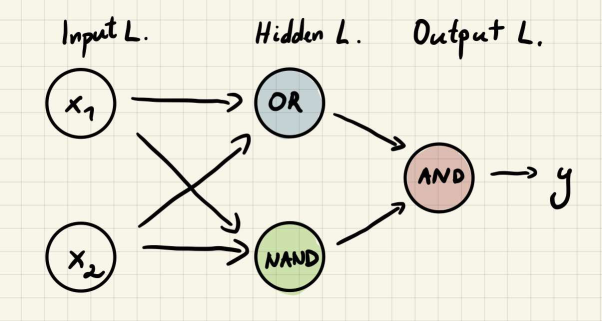

   ---

In [175]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Hidden Layer: OR i NAND
W1 = np.array([[15, 15], [-10, -10]])  # Wagi dla OR i NAND
b1 = np.array([-10, 15])             # Biasy dla OR i NAND

# Output Layer: AND
W2 = np.array([[20, 20]])          # Wagi dla AND
b2 = np.array([-30])               # Bias dla AND

def xor(x):
    A1 = np.dot(x, W1.T) + b1      # Obliczenia Hidden Layer
    O1 = sigmoid(A1)               # Wyjście dla Hidden Layer
    A2 = np.dot(O1, W2.T) + b2     # Obliczenia Output Layer
    O2 = sigmoid(A2)               # Wynik końcowy
    return O2

# Testowanie sieci dla wszystkich przypadków
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
for x in inputs:
    print(f"Input: {x}, Output: {xor(x)[0]:.3f}")

Input: [0 0], Output: 0.000
Input: [0 1], Output: 1.000
Input: [1 0], Output: 1.000
Input: [1 1], Output: 0.000
